In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

In [2]:
df = yf.download(
    tickers = 'AAPL MSFT AMD',
    period="max",
    # start="2010-01-01", 
    # end="2022-03-28",
    interval="1d",
    group_by = 'ticker'
)

[*********************100%***********************]  3 of 3 completed


In [3]:
df

AMD                                                   
                  Open        High         Low       Close   Adj Close   
Date                                                                     
1980-03-17    0.000000    3.302083    3.125000    3.145833    3.145833  \
1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
...                ...         ...         ...         ...         ...   
2023-05-22  104.680000  108.790001  103.489998  108.000000  108.000000   
2023-05-23  107.250000  110.989998  107.190002  108.120003  108.120003   
2023-05-24  105.980003  108.910004  105.639999  108.269997  108.269997   
2023-05-25  117.309998  120.690002  115.800003  120.349998  120.349998   
2023-05-26  122.459999  127.430000  120.889999  127.029999  127.029999   

                             MSFT                                       
               Volume        Open        High         Low       Close   
Date                                                                    
1980-03-17     219600         NaN         NaN         NaN         NaN  \
1980-03-18     727200         NaN         NaN         NaN         NaN   
1980-03-19     295200         NaN         NaN         NaN         NaN   
1980-03-20     159600         NaN         NaN         NaN         NaN   
1980-03-21     130800         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-05-22   65424200  318.600006  322.589996  318.010010  321.179993   
2023-05-23   73099100  320.029999  322.720001  315.250000  315.260010   
2023-05-24   65910500  314.730011  316.500000  312.609985  313.850006   
2023-05-25  108514700  323.239990  326.899994  320.000000  325.920013   
2023-05-26   92812000  324.019989  333.399994  323.880005  332.890015   

                                          AAPL                           
             Adj Close      Volume        Open        High         Low   
Date                                                                     
1980-03-17         NaN         NaN         NaN         NaN         NaN  \
1980-03-18         NaN         NaN         NaN         NaN         NaN   
1980-03-19         NaN         NaN         NaN         NaN         NaN   
1980-03-20         NaN         NaN         NaN         NaN         NaN   
1980-03-21         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-05-22  321.179993  24115700.0  173.979996  174.710007  173.449997   
2023-05-23  315.260010  30797200.0  173.130005  173.380005  171.279999   
2023-05-24  313.850006  23384900.0  171.089996  172.419998  170.520004   
2023-05-25  325.920013  43301700.0  172.410004  173.899994  171.690002   
2023-05-26  332.890015  36600900.0  173.320007  175.770004  173.110001   

                                                
                 Close   Adj Close      Volume  
Date                                            
1980-03-17         NaN         NaN         NaN  
1980-03-18         NaN         NaN         NaN  
1980-03-19         NaN         NaN         NaN  
1980-03-20         NaN         NaN         NaN  
1980-03-21         NaN         NaN         NaN  
...                ...         ...         ...  
2023-05-22  174.199997  174.199997  43570900.0  
2023-05-23  171.559998  171.559998  50747300.0  
2023-05-24  171.839996  171.839996  45143500.0  
2023-05-25  172.990005  172.990005  56058300.0  
2023-05-26  175.429993  175.429993  54794100.0  

[10892 rows x 18 columns]

In [4]:
# Close
close = df.iloc[:, df.columns.get_level_values(1)=='Close']

In [5]:
close.columns = ['AAPL', 'MSFT', 'AMD']
close.dropna(inplace=True)
close

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_3123/602405175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close.dropna(inplace=True)


,AAPL,MSFT,AMD
Date,,,
1986-03-13,15.875000,0.097222,0.110491
1986-03-14,14.625000,0.100694,0.116629
1986-03-17,15.812500,0.102431,0.116071
1986-03-18,15.687500,0.099826,0.119978
1986-03-19,15.312500,0.098090,0.118304
...,...,...,...
2023-05-22,108.000000,321.179993,174.199997
2023-05-23,108.120003,315.260010,171.559998
2023-05-24,108.269997,313.850006,171.839996


In [6]:
df = close.copy()
del close

<Axes: xlabel='Date'>

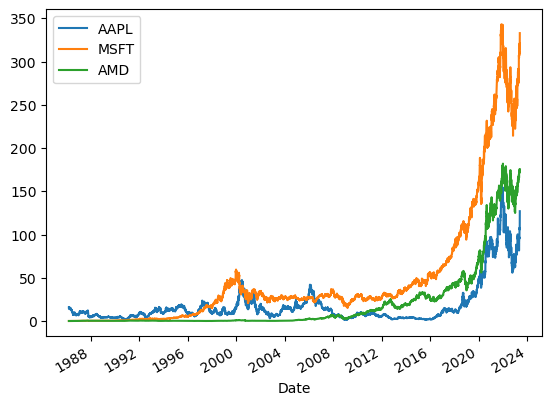

In [7]:
df.plot()

In [11]:
df2 = df.reset_index()
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

df2 = df2.loc[df2['Date'] >= '2023-01-01']
df2.set_index('Date', inplace=True)

In [12]:
df2

,AAPL,MSFT,AMD
Date,,,
2023-01-03,64.019997,239.580002,125.070000
2023-01-04,64.660004,229.100006,126.360001
2023-01-05,62.330002,222.309998,125.019997
2023-01-06,63.959999,224.929993,129.619995
2023-01-09,67.239998,227.119995,130.149994
...,...,...,...
2023-05-22,108.000000,321.179993,174.199997
2023-05-23,108.120003,315.260010,171.559998
2023-05-24,108.269997,313.850006,171.839996


<Axes: xlabel='Date'>

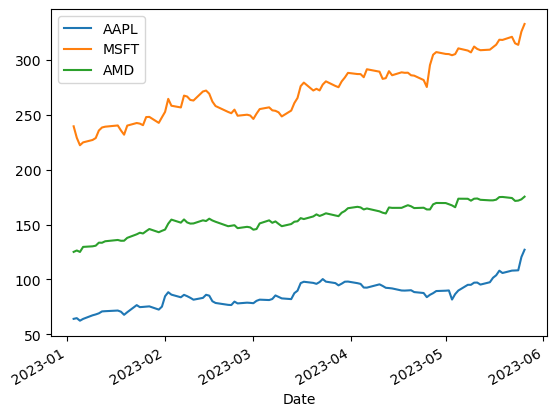

In [13]:
df2.plot()

In [16]:
jres = coint_johansen(df2, det_order=0, k_ar_diff=1)

In [17]:
# Vectores propios
jres.evec

array([[ 0.00060662, -0.07884319, -0.18618052],
       [-0.13558099,  0.08607077, -0.01982978],
       [ 0.31427547, -0.05041409,  0.15558763]])

In [18]:
# Valores propios
jres.eig

array([1.50348129e-01, 3.61366306e-02, 6.07447822e-07])

In [19]:
# trace statistic
jres.trace_stat

array([1.97737563e+01, 3.64382715e+00, 6.01373526e-05])

In [20]:
# trace statistic crit values
jres.trace_stat_crit_vals

array([[27.0669, 29.7961, 35.4628],
       [13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [21]:
jres.max_eig_stat

array([1.61299291e+01, 3.64376701e+00, 6.01373526e-05])

In [22]:
jres.max_eig_stat_crit_vals

array([[18.8928, 21.1314, 25.865 ],
       [12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [23]:
X = df2.to_numpy()
X

array([[ 64.01999664, 239.58000183, 125.06999969],
       [ 64.66000366, 229.1000061 , 126.36000061],
       [ 62.33000183, 222.30999756, 125.01999664],
       [ 63.95999908, 224.92999268, 129.61999512],
       [ 67.23999786, 227.11999512, 130.1499939 ],
       [ 68.05000305, 228.8500061 , 130.72999573],
       [ 69.05999756, 235.77000427, 133.49000549],
       [ 70.80000305, 238.50999451, 133.41000366],
       [ 71.        , 239.22999573, 134.75999451],
       [ 71.58999634, 240.3500061 , 135.94000244],
       [ 70.52999878, 235.80999756, 135.21000671],
       [ 67.70999908, 231.92999268, 135.27000427],
       [ 70.06999969, 240.22000122, 137.86999512],
       [ 76.52999878, 242.58000183, 141.11000061],
       [ 74.69999695, 242.03999329, 142.52999878],
       [ 74.91000366, 240.61000061, 141.86000061],
       [ 75.16000366, 248.        , 143.96000671],
       [ 75.40000153, 248.16000366, 145.92999268],
       [ 72.44999695, 242.71000671, 143.        ],
       [ 75.15000153, 247.80999

In [28]:
y = np.matmul(X, np.array(jres.evec[1]))

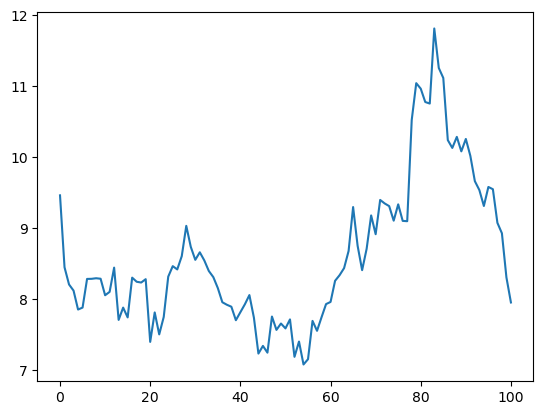

In [29]:
plt.plot(y)

In [31]:
adfuller(y)

(-1.8081168299420207,
 0.37643942414835524,
 0,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 71.27930495073284)